Column Names: Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1  

/home/nikhi/jupyter/jupyter_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nikhi/jupyter/jupyter_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nikhi/jupyter/jupyter_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

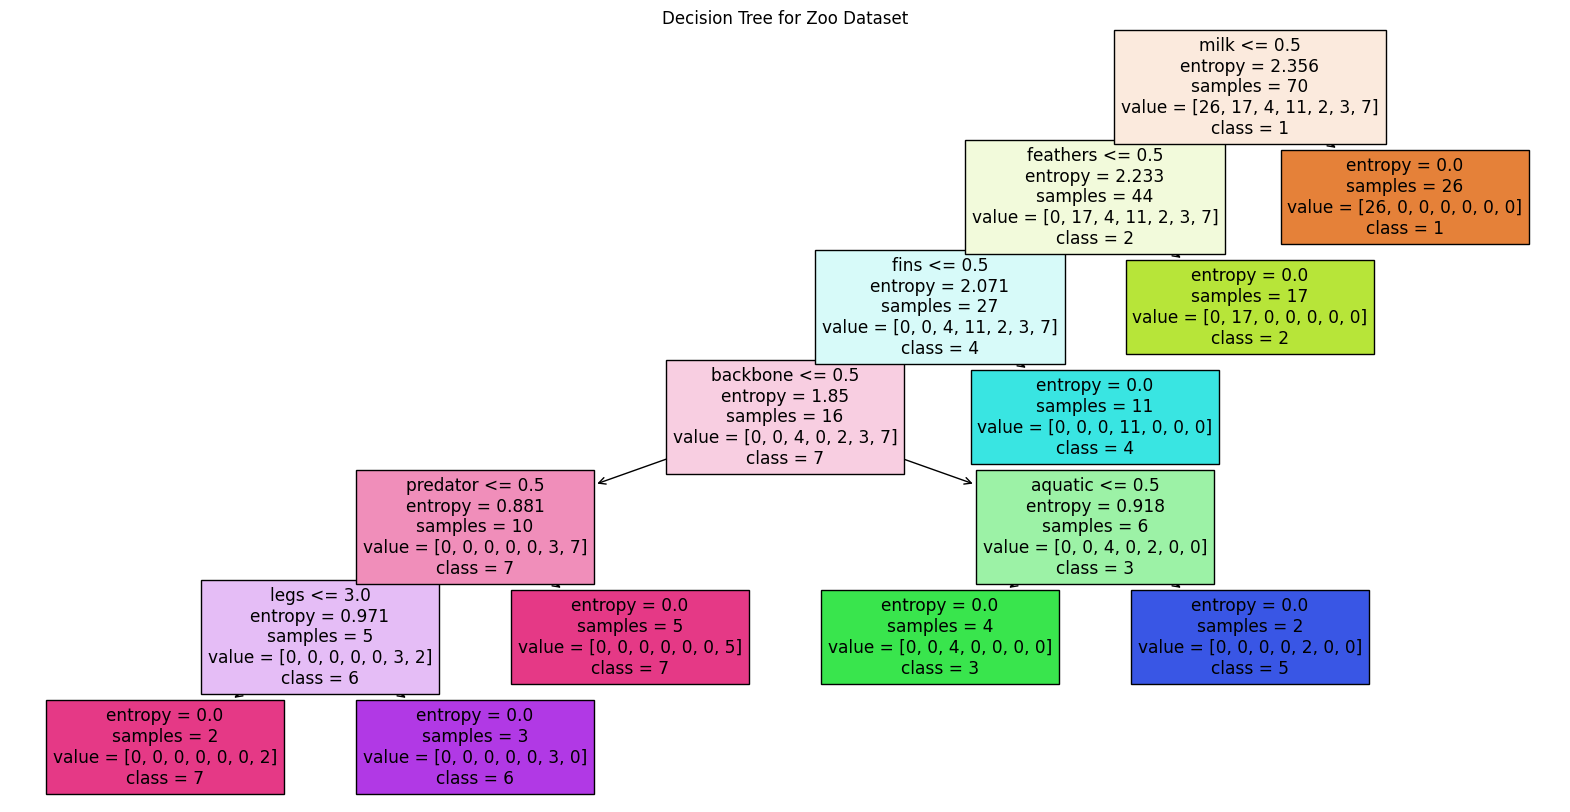

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# --- Load the dataset ---
df = pd.read_csv("zoo.csv")

# --- Check the column names and data structure ---
print("Column Names:", df.columns)
print(df.head())

# --- Drop non-numeric and irrelevant columns ---
# Let's assume 'animal_name' is a non-numeric column and 'class_type' is the target column
X = df.drop(['animal_name', 'class_type'], axis=1)  # Drop 'animal_name' and 'class_type' column
y = df['class_type']  # Target variable: the class of the animal

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train the Decision Tree Classifier ---
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# --- Predict on test data ---
y_pred = model.predict(X_test)

# --- Evaluation ---
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# --- Classification Report ---
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# --- Plot the Decision Tree ---
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_.astype(str), filled=True)
plt.title("Decision Tree for Zoo Dataset")
plt.show()
